<a href="https://colab.research.google.com/github/InezaRW/InezaRW/blob/main/Multi_Hazard_Rwanda_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries Used

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Used

In [44]:
data = '/content/Multi_Hazard_Rwanda_2021.csv'
df = pd.read_csv(data)
df.head()

,Province,District,Hazard,Death_2021,Damaged_House_2021
0,Kigali,Gasabo,Flood,7,5
1,Kigali,Gasabo,Landslide,12,8
2,Kigali,Gasabo,Rainstorm,2,149
3,Kigali,Gasabo,Windstom,0,13
4,Kigali,Gasabo,Lightenin,3,3


#Data Description

In [45]:
print(df.describe())

       Death_2021  Damaged_House_2021
count  150.000000          150.000000
mean     2.173333           54.840000
std      4.301938          139.428897
min      0.000000            0.000000
25%      0.000000            0.000000
50%      1.000000            5.000000
75%      2.000000           46.000000
max     28.000000         1169.000000


#Checking for missing

In [46]:
print(df.isnull().sum())

Province              0
District              0
Hazard                0
Death_2021            0
Damaged_House_2021    0
dtype: int64


#Visualisation

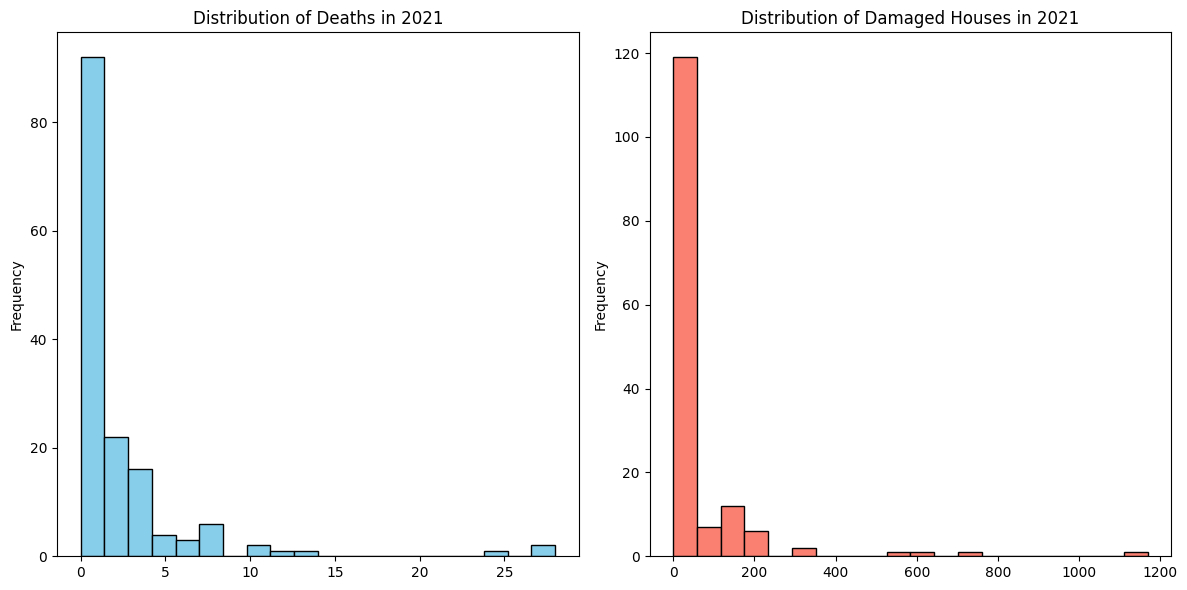

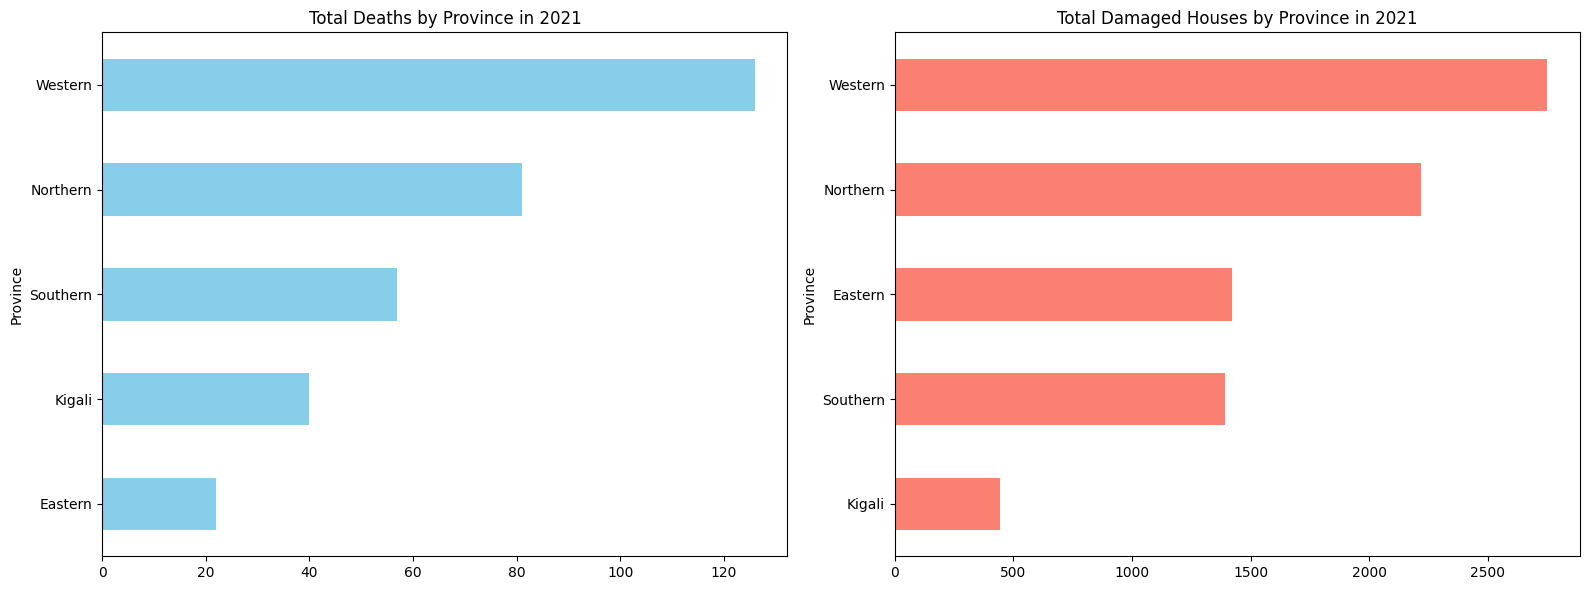

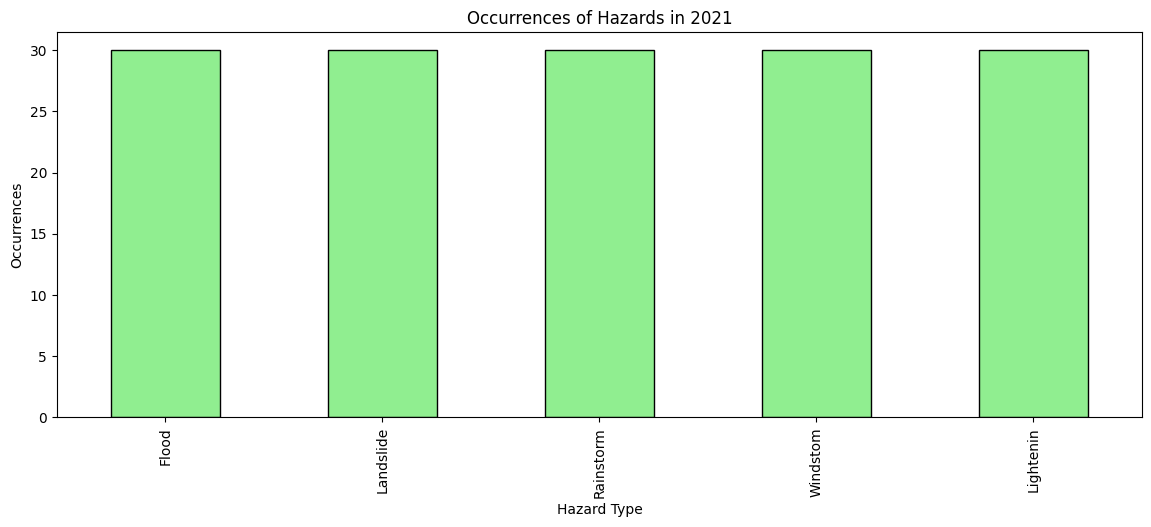

In [47]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['Death_2021'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Deaths in 2021')

plt.subplot(1, 2, 2)
df['Damaged_House_2021'].plot(kind='hist', bins=20, edgecolor='black', color='salmon')
plt.title('Distribution of Damaged Houses in 2021')

plt.tight_layout()
plt.show()

# Explore regional variations
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
df.groupby('Province')['Death_2021'].sum().sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Deaths by Province in 2021')

plt.subplot(1, 2, 2)
df.groupby('Province')['Damaged_House_2021'].sum().sort_values().plot(kind='barh', color='salmon')
plt.title('Total Damaged Houses by Province in 2021')

plt.tight_layout()
plt.show()

# Explore hazard occurrences
plt.figure(figsize=(14, 5))
df['Hazard'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Occurrences of Hazards in 2021')
plt.xlabel('Hazard Type')
plt.ylabel('Occurrences')
plt.show()

<ipython-input-76-e3954164bab5>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Province', y='Death_2021', data=df, hue='Hazard', ci=None)


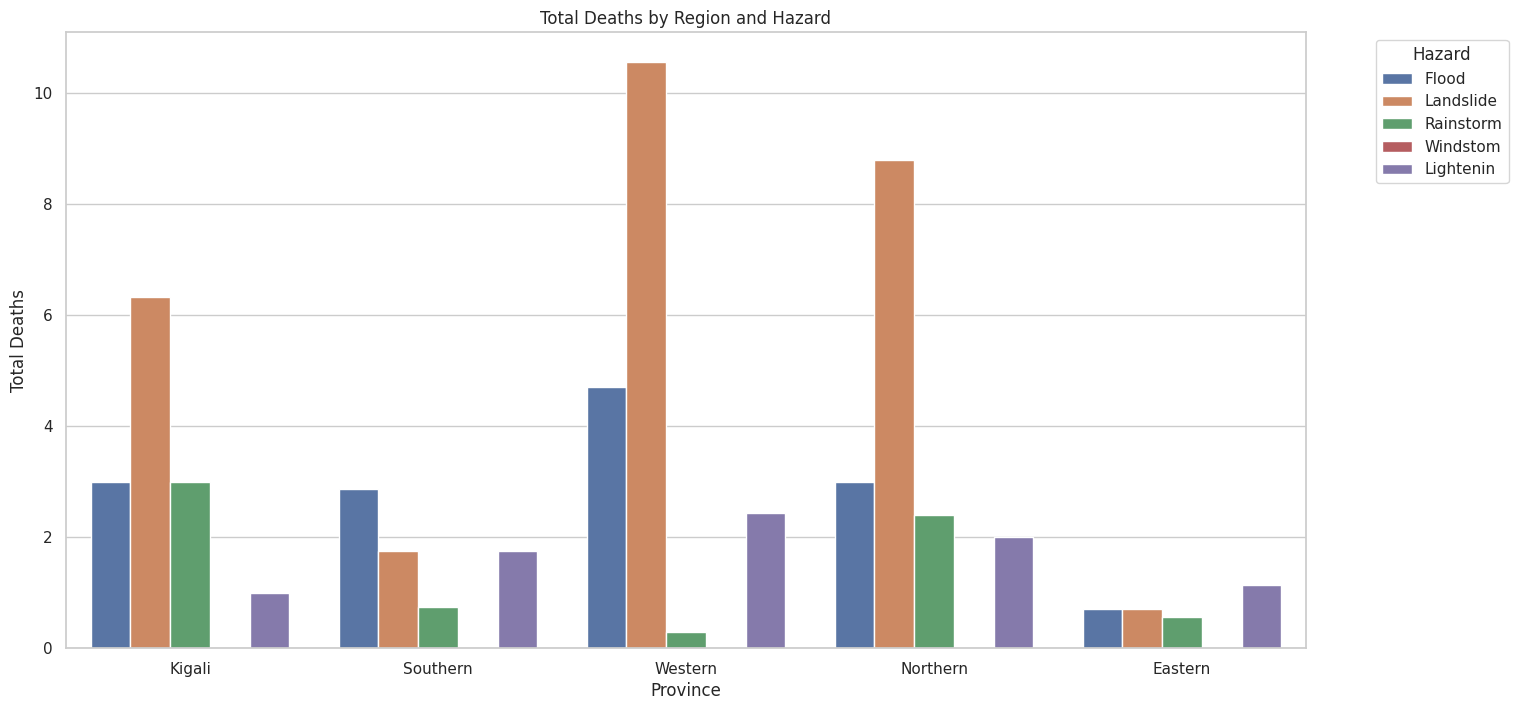

<ipython-input-76-e3954164bab5>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Province', y='Damaged_House_2021', data=df, hue='Hazard', ci=None)


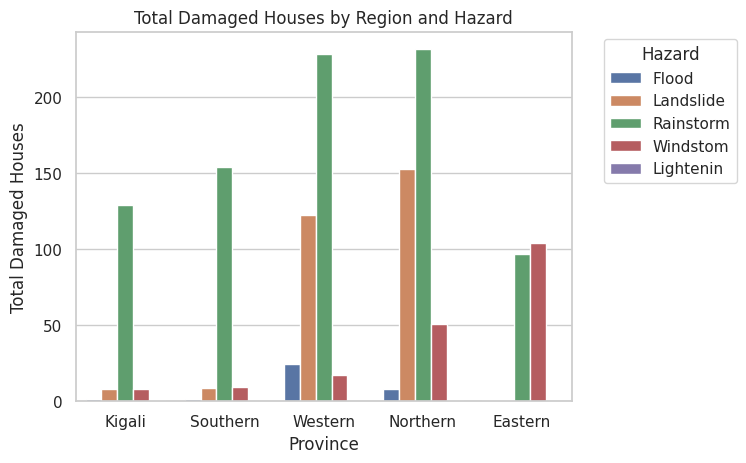

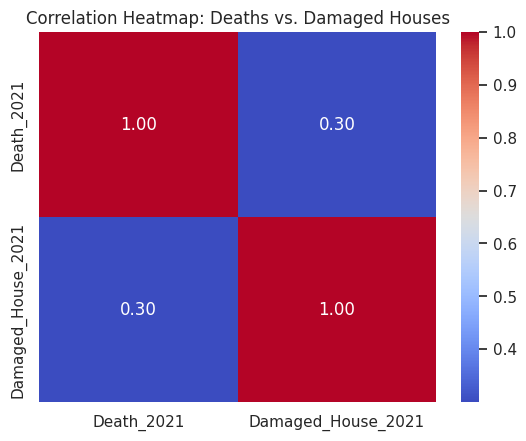

In [76]:
# Explore regional variations in the impact of various hazards
plt.figure(figsize=(16, 8))

# Bar plot for total deaths and house damage by region
sns.barplot(x='Province', y='Death_2021', data=df, hue='Hazard', ci=None)
plt.title('Total Deaths by Region and Hazard')
plt.xlabel('Province')
plt.ylabel('Total Deaths')
plt.legend(title='Hazard', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

sns.barplot(x='Province', y='Damaged_House_2021', data=df, hue='Hazard', ci=None)
plt.title('Total Damaged Houses by Region and Hazard')
plt.xlabel('Province')
plt.ylabel('Total Damaged Houses')
plt.legend(title='Hazard', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Correlation heatmap
correlation_matrix = df[['Death_2021', 'Damaged_House_2021']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Deaths vs. Damaged Houses')
plt.show()



#Visualization

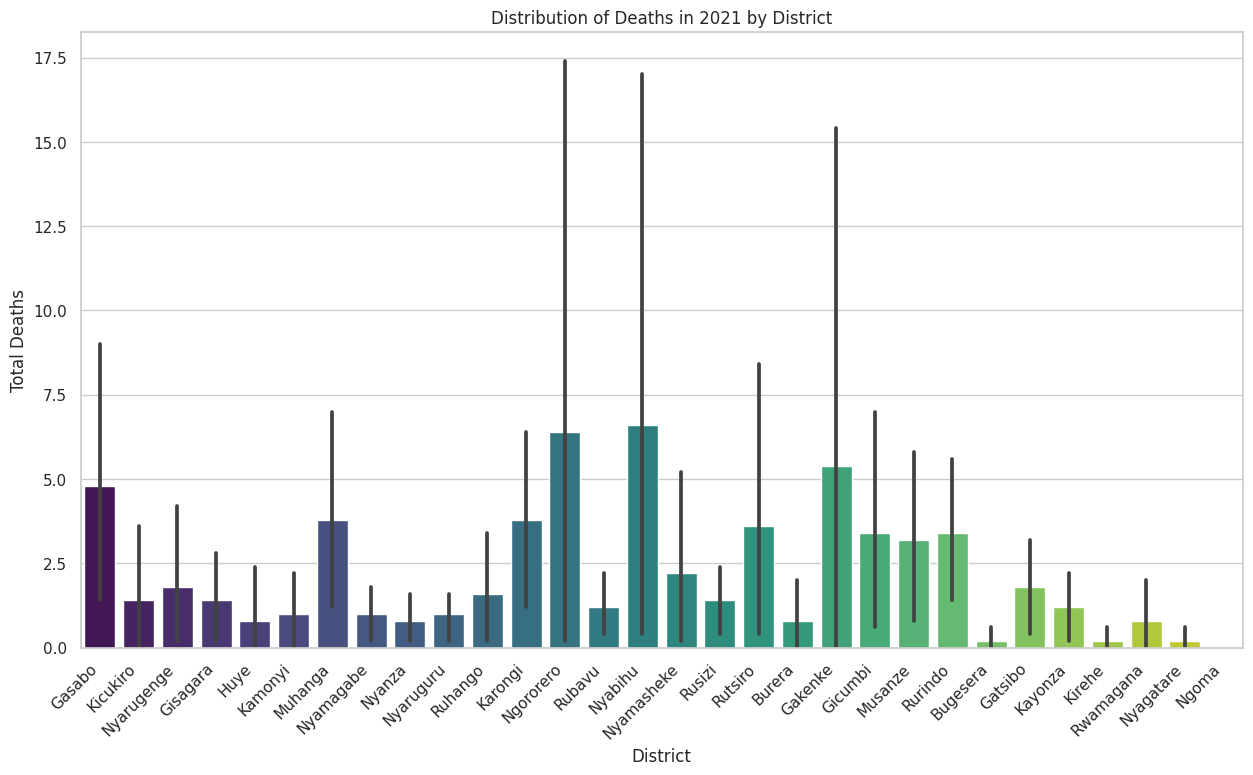

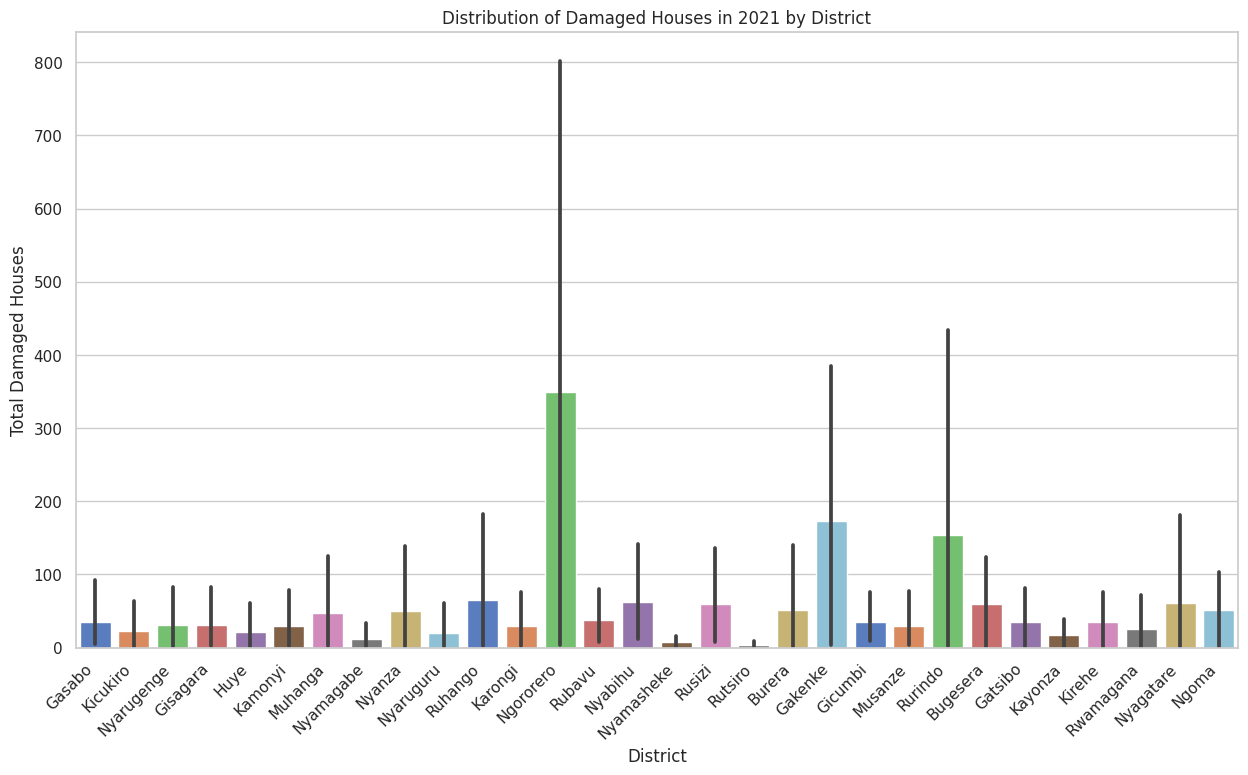

In [65]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Plot deaths
sns.barplot(x='District', y='Death_2021', data=df, palette='viridis')
plt.title('Distribution of Deaths in 2021 by District')
plt.xlabel('District')
plt.ylabel('Total Deaths')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Plot damaged houses
sns.barplot(x='District', y='Damaged_House_2021', data=df, palette='muted')
plt.title('Distribution of Damaged Houses in 2021 by District')
plt.xlabel('District')
plt.ylabel('Total Damaged Houses')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()



# Calculate severity and likelihood for each district, using the sum of 'Death_2021' and 'Damaged_House_2021' as severity and the count of hazards as likelihood
# Prioritize groups based on total risk
# Calculate risk as a percentage of the total risk

<ipython-input-97-622eaa44c2f6>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('District')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.8)).sum(axis=1)),
<ipython-input-97-622eaa44c2f6>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('District')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.6)).sum(axis=1)),
<ipython-input-97-622eaa44c2f6>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('District')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.4)).sum(axis=1)),
<ipython-input-97-622eaa44c2f6>:12: Fu


Calculated Values:
    District     Hazard  Probability  Likelihood  Severity  Risk
0     Gasabo      Flood          0.2         0.2         3   0.6
1     Gasabo  Landslide          0.2         0.2         4   0.8
2     Gasabo  Rainstorm          0.2         0.2         5   1.0
3     Gasabo   Windstom          0.2         0.2         3   0.6
4     Gasabo  Lightenin          0.2         0.2         1   0.2
..       ...        ...          ...         ...       ...   ...
145    Ngoma      Flood          0.2         0.2         2   0.4
146    Ngoma  Landslide          0.2         0.2         3   0.6
147    Ngoma  Rainstorm          0.2         0.2         4   0.8
148    Ngoma   Windstom          0.2         0.2         5   1.0
149    Ngoma  Lightenin          0.2         0.2         2   0.4

[150 rows x 6 columns]

Prioritized Groups:
Index(['Rainstorm', 'Landslide', 'Windstom', 'Flood', 'Lightenin'], dtype='object', name='Hazard')

Calculated Risk Percentage:
    District     Hazard  Ri

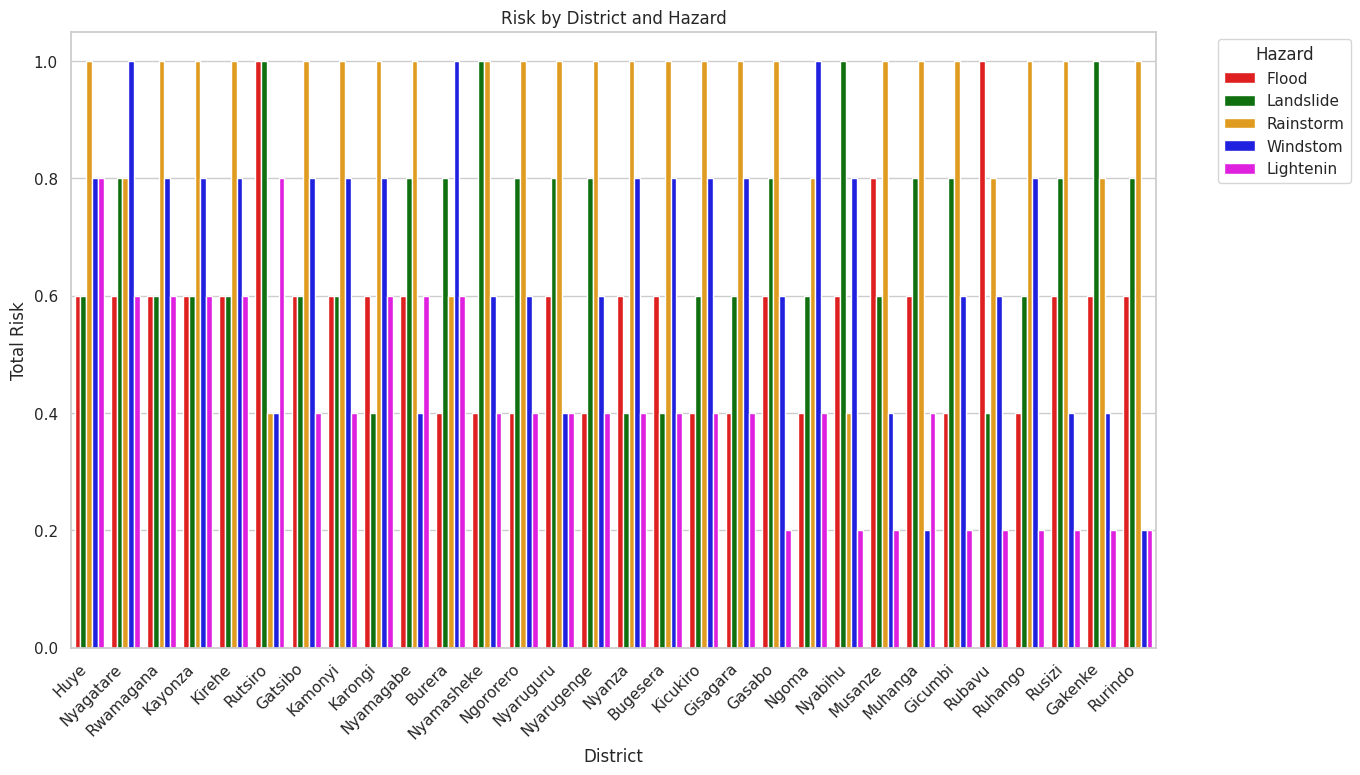

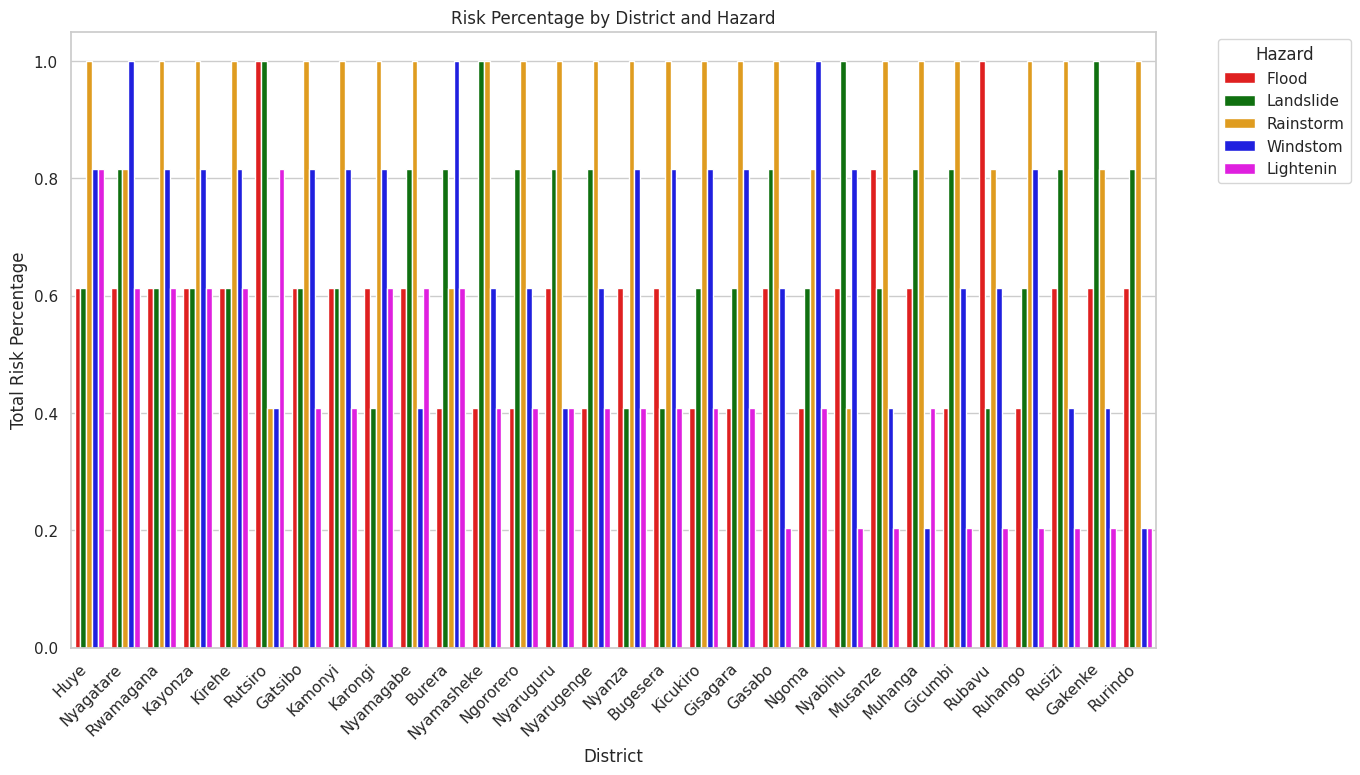

In [97]:
# Calculate probability of each hazard in each district
df['Probability'] = df.groupby(['District', 'Hazard'])['Hazard'].transform('count') / df.groupby('District')['Hazard'].transform('count')

# Calculate normalized likelihood based on hazard counts in each district
df['Likelihood'] = df.groupby(['District', 'Hazard'])['Hazard'].transform('count') / df.groupby('District')['Hazard'].transform('count').max()

# Calculate severity based on impact compared to others in the same district
severity_conditions = [
    (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('District')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.8)).sum(axis=1)),
    (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('District')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.6)).sum(axis=1)),
    (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('District')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.4)).sum(axis=1)),
    (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('District')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.2)).sum(axis=1)),
    (df['Death_2021'] + df['Damaged_House_2021'] < df.groupby('District')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.2)).sum(axis=1))
]

severity_values = [5, 4, 3, 2, 1]

df['Severity'] = np.select(severity_conditions, severity_values)

# Calculate risk as the product of severity and likelihood
df['Risk'] = df['Severity'] * df['Likelihood']

# Prioritize groups based on total risk
group_prioritization = df.groupby('Hazard')['Risk'].sum().sort_values(ascending=False).index

# Display the calculated values
print("\nCalculated Values:")
print(df[['District', 'Hazard', 'Probability', 'Likelihood', 'Severity', 'Risk']])

# Display the prioritized groups
print("\nPrioritized Groups:")
print(group_prioritization)

# Calculate risk as a percentage of the total risk
df['Risk_Percentage'] = (df['Risk'] / df['Risk'].sum()) * 100

# Round 'Risk_Percentage' to 1 if it's greater than 1
df['Risk_Percentage'] = df['Risk_Percentage'].clip(upper=1)

# Display the calculated risk percentage
print("\nCalculated Risk Percentage:")
print(df[['District', 'Hazard', 'Risk_Percentage']])

# Custom color palette
custom_palette = {'Flood': 'red', 'Landslide': 'green', 'Rainstorm': 'orange', 'Windstom': 'blue', 'Lightenin': 'magenta'}

# Plotting with custom colors
plt.figure(figsize=(14, 8))
sns.barplot(x='District', y='Risk', hue='Hazard', data=df, palette=custom_palette, order=df.groupby('District')['Risk'].sum().sort_values(ascending=False).index)
plt.title('Risk by District and Hazard')
plt.xlabel('District')
plt.ylabel('Total Risk')
plt.legend(title='Hazard', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

# Plotting with custom colors
plt.figure(figsize=(14, 8))
sns.barplot(x='District', y='Risk_Percentage', hue='Hazard', data=df, palette=custom_palette, order=df.groupby('District')['Risk'].sum().sort_values(ascending=False).index)
plt.title('Risk Percentage by District and Hazard')
plt.xlabel('District')
plt.ylabel('Total Risk Percentage')
plt.legend(title='Hazard', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


#Criteria: Please note that the probabilities are based on the assumption that the impact of each hazard in a district contributes to the overall probability of that hazard in the province.

Probability Contribution by Province and Hazard:
    Province     Hazard  Probability_Death  Probability_Damaged_House
0    Eastern      Flood           0.101852                   0.004074
1    Eastern  Landslide           0.111111                   0.002147
2    Eastern  Lightenin           0.495370                   0.000000
3    Eastern  Rainstorm           0.291667                   0.547256
4    Eastern   Windstom           0.000000                   0.446523
5     Kigali      Flood           0.171296                   0.009363
6     Kigali  Landslide           0.436508                   0.054134
7     Kigali  Lightenin           0.041667                   0.005618
8     Kigali  Rainstorm           0.350529                   0.878019
9     Kigali   Windstom           0.000000                   0.052866
10  Northern      Flood           0.172903                   0.036040
11  Northern  Landslide           0.410185                   0.233102
12  Northern  Lightenin           0.15661

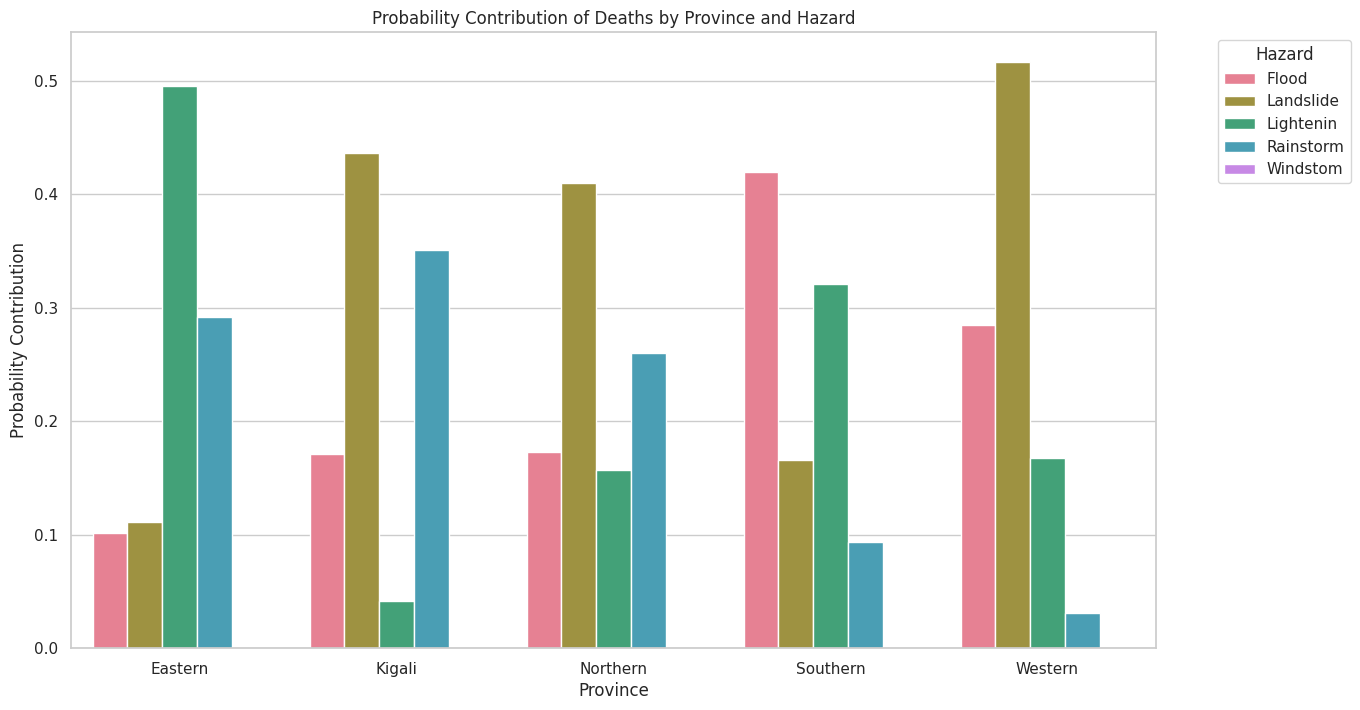

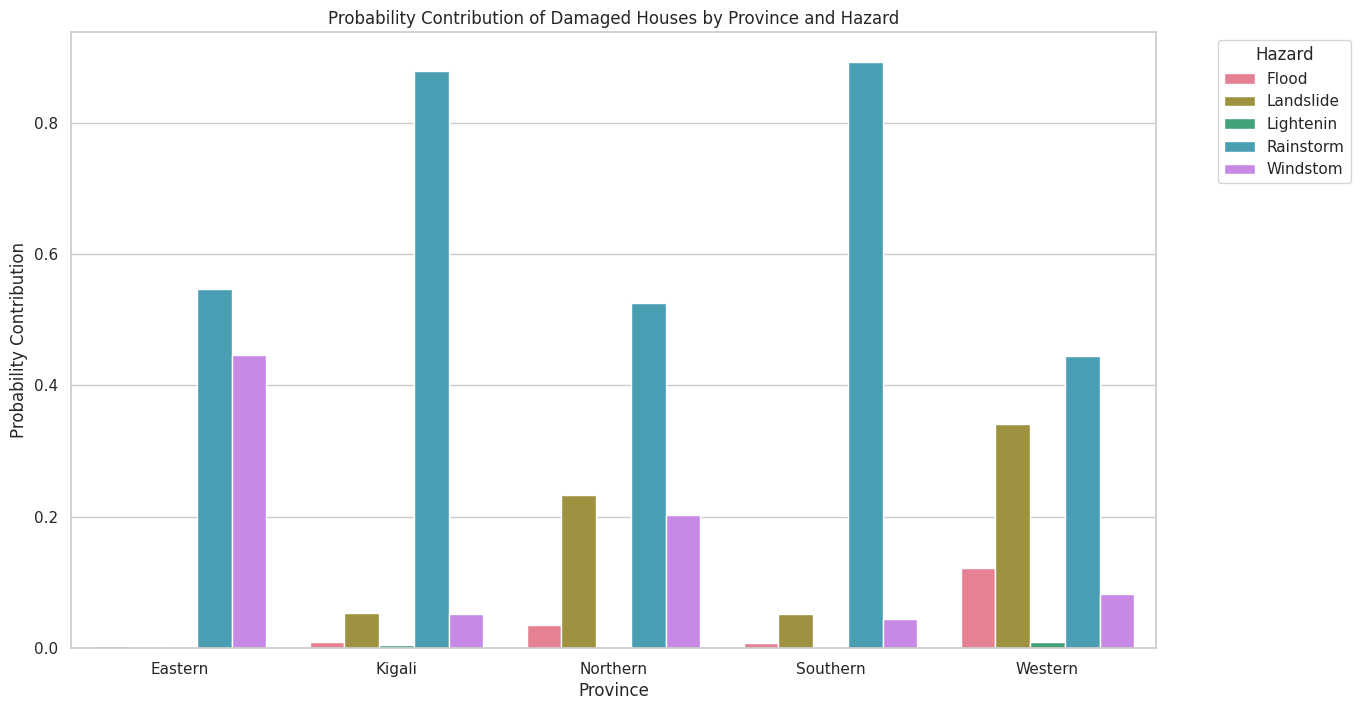

In [99]:

# Calculate probability of each hazard in each district
df['Probability_Death'] = df['Death_2021'] / df.groupby('District')['Death_2021'].transform('sum')
df['Probability_Damaged_House'] = df['Damaged_House_2021'] / df.groupby('District')['Damaged_House_2021'].transform('sum')

# Calculate probability contribution of each hazard in each province
province_probs = df.groupby(['Province', 'Hazard'])[['Probability_Death', 'Probability_Damaged_House']].mean().reset_index()

# Print table with province, hazard, and probability contribution
print("Probability Contribution by Province and Hazard:")
print(province_probs)

# Plotting probability contribution by province and hazard
plt.figure(figsize=(14, 8))

# Bar plot for probability contribution by province and hazard
sns.barplot(x='Province', y='Probability_Death', hue='Hazard', data=province_probs, palette='husl')
plt.title('Probability Contribution of Deaths by Province and Hazard')
plt.xlabel('Province')
plt.ylabel('Probability Contribution')
plt.legend(title='Hazard', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Province', y='Probability_Damaged_House', hue='Hazard', data=province_probs, palette='husl')
plt.title('Probability Contribution of Damaged Houses by Province and Hazard')
plt.xlabel('Province')
plt.ylabel('Probability Contribution')
plt.legend(title='Hazard', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



<ipython-input-103-edc45054298e>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('Province')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.8)).sum(axis=1)),
<ipython-input-103-edc45054298e>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('Province')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.6)).sum(axis=1)),
<ipython-input-103-edc45054298e>:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('Province')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.4)).sum(axis=1)),
<ipython-input-103-edc45054298e>:1


Calculated Values:
    Province     Hazard  Probability_Death  Probability_Damaged_House  \
0     Kigali      Flood              0.175                   0.011236   
1     Kigali  Landslide              0.300                   0.017978   
2     Kigali  Rainstorm              0.050                   0.334831   
3     Kigali   Windstom              0.000                   0.029213   
4     Kigali  Lightenin              0.075                   0.006742   
..       ...        ...                ...                        ...   
145  Eastern      Flood              0.000                   0.000000   
146  Eastern  Landslide              0.000                   0.002113   
147  Eastern  Rainstorm              0.000                   0.085915   
148  Eastern   Windstom              0.000                   0.092254   
149  Eastern  Lightenin              0.000                   0.000000   

     Severity  Likelihood  Risk  Risk_Percentage  
0           4          15    60         0.355345  
1

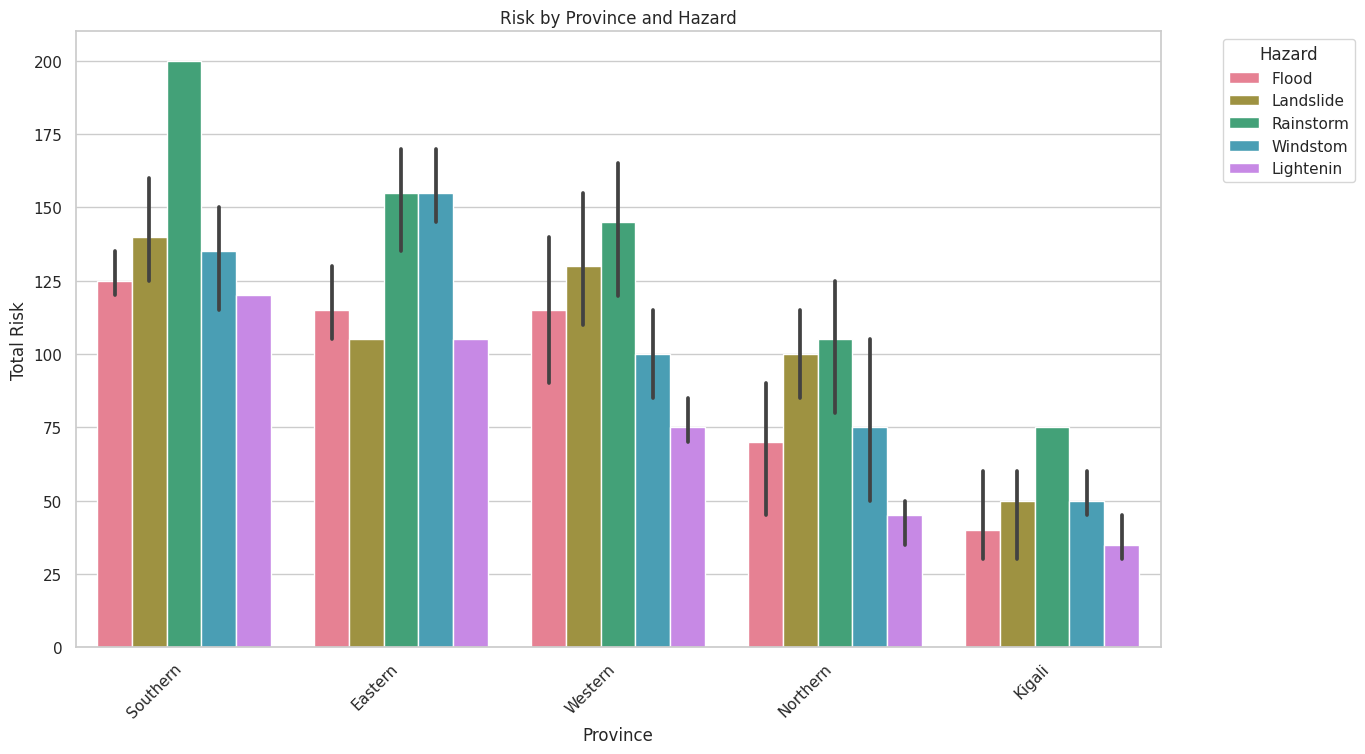

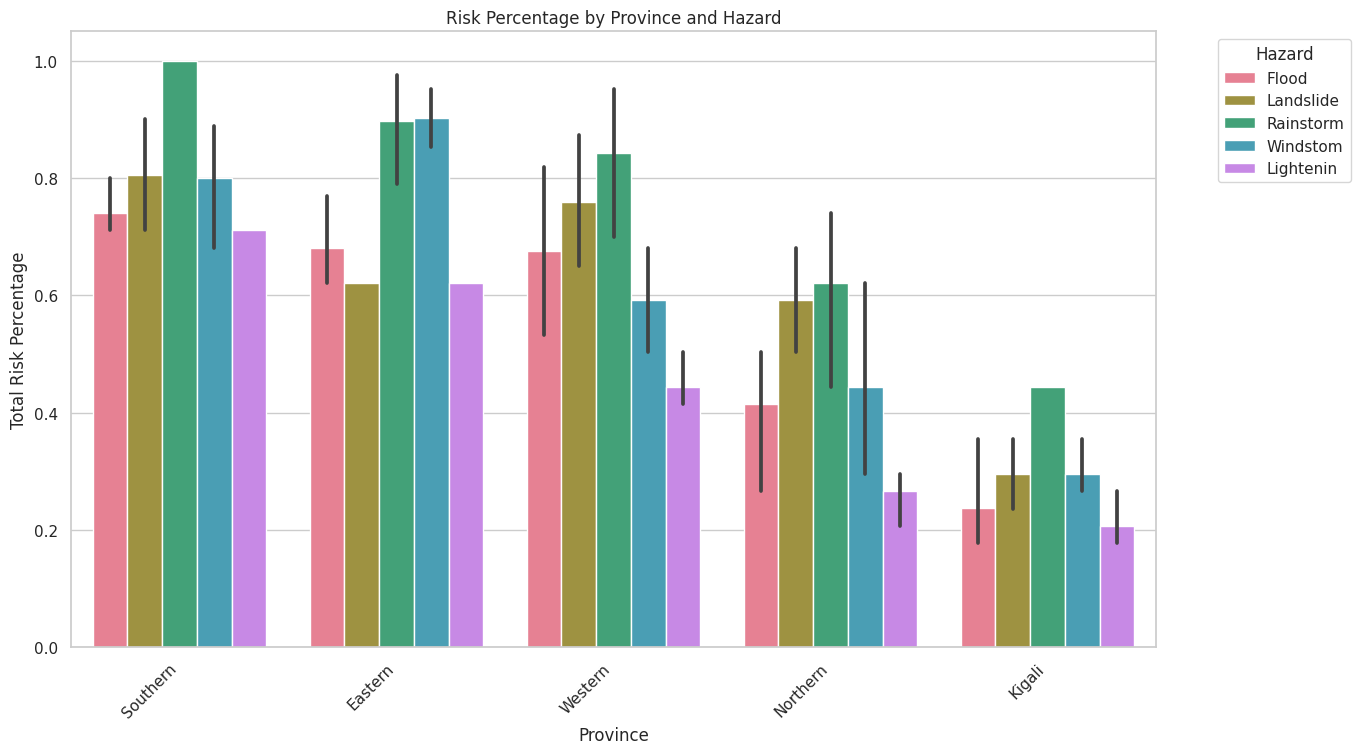

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = '/content/Multi_Hazard_Rwanda_2021.csv'
df = pd.read_csv(data)

# Calculate severity as very low, low, medium, high, very high
severity_conditions = [
    (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('Province')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.8)).sum(axis=1)),
    (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('Province')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.6)).sum(axis=1)),
    (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('Province')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.4)).sum(axis=1)),
    (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('Province')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.2)).sum(axis=1)),
    (df['Death_2021'] + df['Damaged_House_2021'] < df.groupby('Province')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.2)).sum(axis=1))
]

severity_values = [5, 4, 3, 2, 1]

df['Severity'] = np.select(severity_conditions, severity_values)

# Calculate likelihood based on the count of hazards
df['Likelihood'] = df.groupby('Province')['Hazard'].transform('count')

# Calculate risk as the product of severity and likelihood
df['Risk'] = df['Severity'] * df['Likelihood']

# Calculate risk percentage
df['Risk_Percentage'] = (df['Risk'] / df['Risk'].sum()) * 100
df['Risk_Percentage'] = df['Risk_Percentage'].clip(upper=1)  # Round to 1 if greater than 1

# Calculate probability of each hazard in each province
df['Probability_Death'] = df['Death_2021'] / df.groupby('Province')['Death_2021'].transform('sum')
df['Probability_Damaged_House'] = df['Damaged_House_2021'] / df.groupby('Province')['Damaged_House_2021'].transform('sum')

# Display the calculated values
print("\nCalculated Values:")
print(df[['Province', 'Hazard', 'Probability_Death', 'Probability_Damaged_House', 'Severity', 'Likelihood', 'Risk', 'Risk_Percentage']])

# Prioritize groups based on total risk
group_prioritization = df.groupby('Hazard')['Risk'].sum().sort_values(ascending=False).index

# Display the prioritized groups
print("\nPrioritized Groups:")
print(group_prioritization)

# Plotting with different colors
plt.figure(figsize=(14, 8))
sns.barplot(x='Province', y='Risk', hue='Hazard', data=df, palette='husl', order=df.groupby('Province')['Risk'].sum().sort_values(ascending=False).index)
plt.title('Risk by Province and Hazard')
plt.xlabel('Province')
plt.ylabel('Total Risk')
plt.legend(title='Hazard', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

# Plotting with different colors
plt.figure(figsize=(14, 8))
sns.barplot(x='Province', y='Risk_Percentage', hue='Hazard', data=df, palette='husl', order=df.groupby('Province')['Risk'].sum().sort_values(ascending=False).index)
plt.title('Risk Percentage by Province and Hazard')
plt.xlabel('Province')
plt.ylabel('Total Risk Percentage')
plt.legend(title='Hazard', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


<ipython-input-104-300b354e0341>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('Province')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.8)).sum(axis=1)),
<ipython-input-104-300b354e0341>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('Province')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.6)).sum(axis=1)),
<ipython-input-104-300b354e0341>:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('Province')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.4)).sum(axis=1)),
<ipython-input-104-300b354e0341>:1


Calculated Values:
    Province District     Hazard  Severity  Likelihood  Risk  Risk_Percentage  \
0     Kigali   Gasabo      Flood         4          15    60         0.355345   
1     Kigali   Gasabo  Landslide         4          15    60         0.355345   
2     Kigali   Gasabo  Rainstorm         5          15    75         0.444181   
3     Kigali   Gasabo   Windstom         4          15    60         0.355345   
4     Kigali   Gasabo  Lightenin         3          15    45         0.266509   
..       ...      ...        ...       ...         ...   ...              ...   
145  Eastern    Ngoma      Flood         3          35   105         0.621854   
146  Eastern    Ngoma  Landslide         3          35   105         0.621854   
147  Eastern    Ngoma  Rainstorm         5          35   175         1.000000   
148  Eastern    Ngoma   Windstom         5          35   175         1.000000   
149  Eastern    Ngoma  Lightenin         3          35   105         0.621854   

       

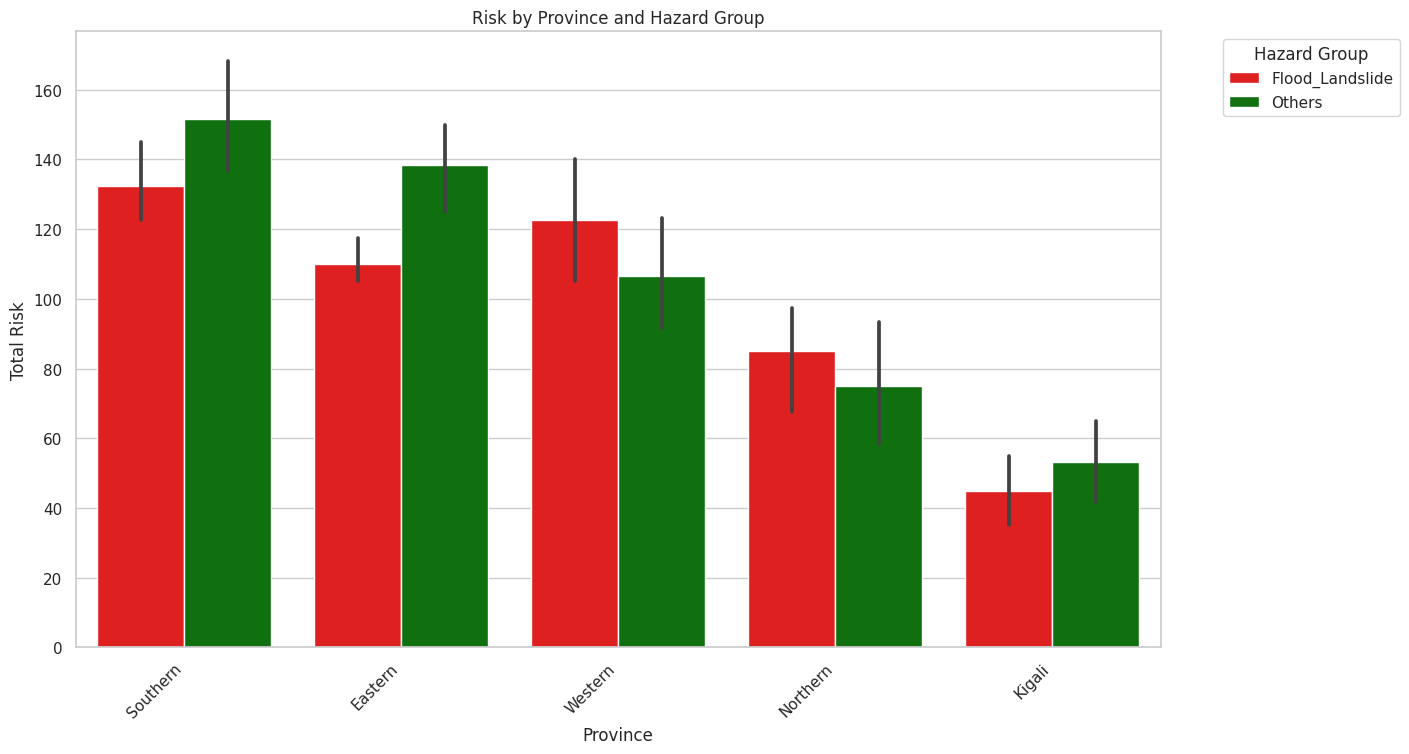

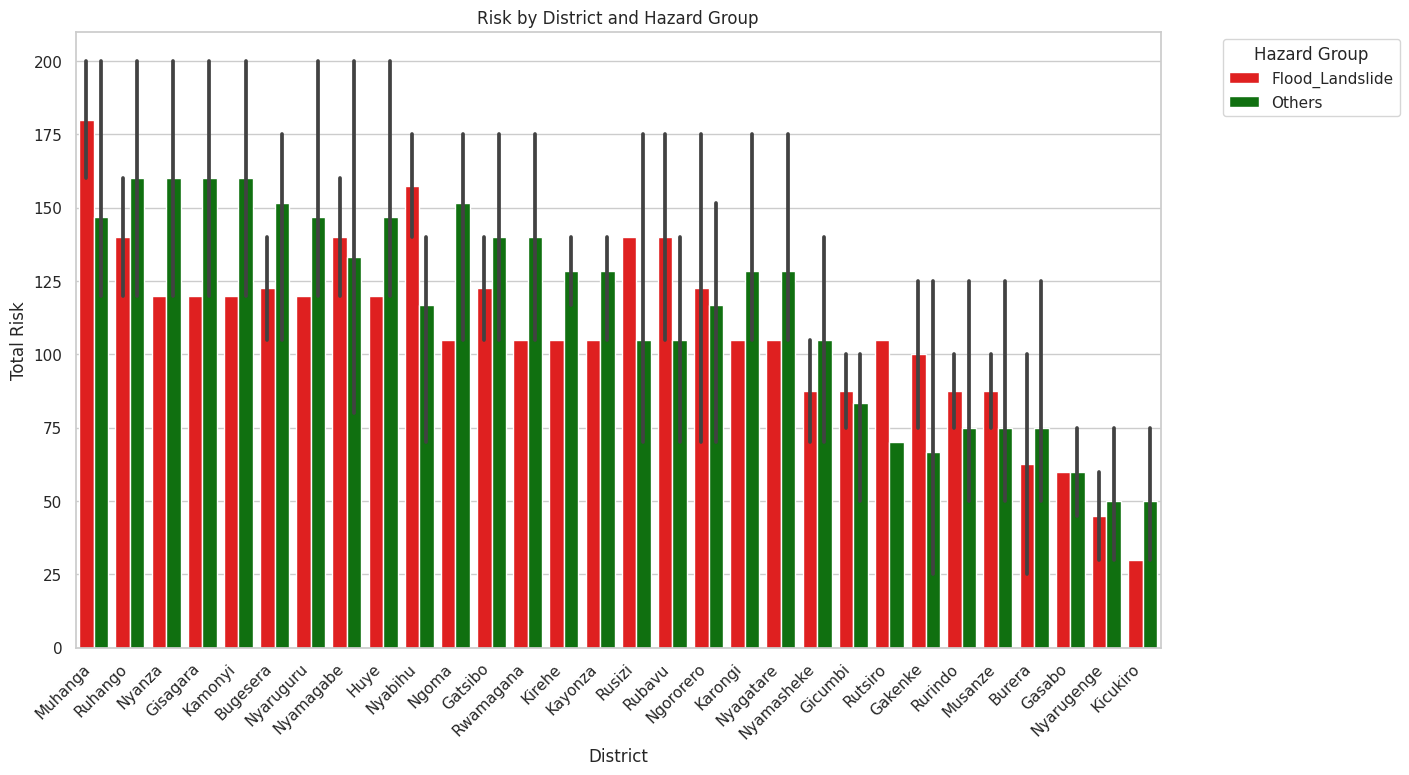

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = '/content/Multi_Hazard_Rwanda_2021.csv'
df = pd.read_csv(data)

# Calculate severity as very low, low, medium, high, very high
severity_conditions = [
    (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('Province')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.8)).sum(axis=1)),
    (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('Province')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.6)).sum(axis=1)),
    (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('Province')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.4)).sum(axis=1)),
    (df['Death_2021'] + df['Damaged_House_2021'] >= df.groupby('Province')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.2)).sum(axis=1)),
    (df['Death_2021'] + df['Damaged_House_2021'] < df.groupby('Province')['Death_2021', 'Damaged_House_2021'].transform(lambda x: x.quantile(0.2)).sum(axis=1))
]

severity_values = [5, 4, 3, 2, 1]

df['Severity'] = np.select(severity_conditions, severity_values)

# Calculate likelihood based on the count of hazards
df['Likelihood'] = df.groupby('Province')['Hazard'].transform('count')

# Calculate risk as the product of severity and likelihood
df['Risk'] = df['Severity'] * df['Likelihood']

# Calculate risk percentage
df['Risk_Percentage'] = (df['Risk'] / df['Risk'].sum()) * 100
df['Risk_Percentage'] = df['Risk_Percentage'].clip(upper=1)  # Round to 1 if greater than 1

# Group hazards into 'Flood_Landslide' and 'Others'
df['Hazard_Group'] = np.where(df['Hazard'].isin(['Flood', 'Landslide']), 'Flood_Landslide', 'Others')

# Display the calculated values
print("\nCalculated Values:")
print(df[['Province', 'District', 'Hazard', 'Severity', 'Likelihood', 'Risk', 'Risk_Percentage', 'Hazard_Group']])

# Prioritize groups based on total risk
group_prioritization = df.groupby('Hazard_Group')['Risk'].sum().sort_values(ascending=False).index

# Display the prioritized groups
print("\nPrioritized Groups:")
print(group_prioritization)

# Plotting with different colors
plt.figure(figsize=(14, 8))
sns.barplot(x='Province', y='Risk', hue='Hazard_Group', data=df, palette=['red', 'green'], order=df.groupby('Province')['Risk'].sum().sort_values(ascending=False).index)
plt.title('Risk by Province and Hazard Group')
plt.xlabel('Province')
plt.ylabel('Total Risk')
plt.legend(title='Hazard Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

# Plotting with different colors
plt.figure(figsize=(14, 8))
sns.barplot(x='District', y='Risk', hue='Hazard_Group', data=df, palette=['red', 'green'], order=df.groupby('District')['Risk'].sum().sort_values(ascending=False).index)
plt.title('Risk by District and Hazard Group')
plt.xlabel('District')
plt.ylabel('Total Risk')
plt.legend(title='Hazard Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()
